In [26]:
!pip install numpy
!pip install matplotlib

In [20]:
!pip install scikit-learn

In [27]:
# Importacion de las librerias
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [56]:
class Perceptron(object):
    """ Clasificador perceptrón

    Parámetros
    ----------
    eta : float
        Taza de aprendizaje (entre 0.0 y 1.0)
    n_iter : int
        Pasos sobre la muestra de entrenamiento
    random_state : int
        Semilla generadora de número aleatorio para la inicialización de pesos aleatorios
    init_weigt: boolean
        Forma de inicializar los pesos
    weights: list[int]
        Pesos iniciales
    shuffle: boolean
        Indica el orden los ejemplos de entreanaiento
    f_activate: string
        Indica la función de activación

    Atributos
    ---------
    w_: arreglo de 1-d
        Pesos después de entrenamiento
    errors_ : list
        Número de clasificaciones incorrectas (actualizaciones) en cada época

    """

    def __init__(self, eta=0.5, n_iter=15, random_state=1, init_weigt=True, weights=None, shuffle=True,
                 f_activate='sing'):
        if weights is None:
            self.weights = []
        else:
            self.weights = weights
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        self.init_weigt = init_weigt
        self.shuffle = shuffle
        self.f_activate = f_activate
        self.w_ = np.array([])
        self.errors_ = []

    def fit(self, X, y):
        """ Ajustar los datos de entrenamiento

        Parámetros
        ----------
        X :
            Vector de entrenamiento
        y:
            Valores objetivo

        Returns
        -------
        self : object

        """
        # Se inicializa los pesos de forma aleatoria
        if self.init_weigt and len(self.weights) == 0:
            # Se crea un generador de números aleatorios con una semilla dada
            rgen = np.random.RandomState(self.random_state)
            # Inicializa los pesos de la red neuronal con valores aleatorios generados por la semilla
            # se aumenta un 1 para colocar el bias
            self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        elif self.init_weigt and len(self.weights) > 0:
            self.w_ = np.array([*self.weights])
        else:
            # Se colocan 0's en el peso
            self.w_ = np.zeros(1 + X.shape[1])
        # bias + la dimension de X
        X_copy = np.ones((X.shape[0], X.shape[1] + 1))
        X_copy[:, 1:] = X
        X = X_copy
        cont = 0
        print("Pesos iniciales", self.w_)

        # Datos para la gráfica
        xx = np.linspace(-1, 8, 21)
        yy = np.array([])

        if self.n_iter > 0:
            # épocas
            for epoch in range(self.n_iter):
                self.train(X, y)
                # Se añade a la lista el número de clasificaciones incorrectas por época
                self.errors_.append(self.evaluation(X, y))
                # Cálculo de la línea de decisión
                yy = (-self.w_[0] - self.w_[1] * xx) / self.w_[2]
        else:
            while True:
                self.train(X, y)
                # Contador para obtener la cantidad de épocas realizadas
                cont += 1
                # Se añade a la lista el número de clasificaciones incorrectas por época
                self.errors_.append(self.evaluation(X, y))
                # Cálculo de la línea de decisión
                yy = (-self.w_[0] - self.w_[1] * xx) / self.w_[2]
                # Si es cero el error ha aprendido todos los ejemplos de entrenamiento
                if self.errors_[len(self.errors_)-1] == 0:
                    break

        # Evaluación de los datos al completarse el entrenamiento
        self.evaluation(X, y)
        if X.shape[1] - 1 == 2:
            print("\n")
            # Grafica de los datos
            plt.rcParams["figure.figsize"] = (7, 7)
            # formando las coordenadas (x, y) para graficarlas
            plt.scatter(x=X[:50, 1], y=X[:50, 2], marker=('o'))
            plt.scatter(x=X[50:, 1], y=X[50:, 2], marker=('x'))
            plt.xlabel('petal length')
            plt.ylabel('sepal length')
            plt.title("Experimento")
            plt.grid()
            plt.show()
            print("\n")
            plt.rcParams["figure.figsize"] = (7, 7)
            plt.scatter(x=X[:50, 1], y=X[:50, 2], marker=('o'))
            plt.scatter(x=X[50:, 1], y=X[50:, 2], marker=('x'))
            plt.plot(xx, yy)
            plt.xlabel('petal length')
            plt.ylabel('sepal length')
            plt.title("Línea de decisión del Experimento")
            plt.grid()
            plt.show()
            print("\n")
            plt.rcParams["figure.figsize"] = (7, 7)
            if self.n_iter > 0:
                plt.scatter([xx for xx in range(self.n_iter)], self.errors_, marker=('o'))
                plt.plot([xx for xx in range(self.n_iter)], self.errors_)
            else:
                plt.scatter([xx for xx in range(cont)], self.errors_, marker=('o'))
                plt.plot([xx for xx in range(cont)], self.errors_)
            plt.xlabel('Epoch')
            plt.ylabel('Error')
            plt.title("Errores en Experimento")
            plt.grid()
            plt.show()
            print("\n")
        return self

    def evaluation(self, X, y):
        """Prueba de los datos una vez que el entrenamiento se ha realizado"""
        clasificaciones_incorrectas = 0
        for fila in range(X.shape[0]):
            y_gorro = self.predict(self.w_.T.dot(X[fila, :]))
            if y_gorro != y[fila]:
                clasificaciones_incorrectas += 1
        return clasificaciones_incorrectas

    def train(self, X, y):
        """ Entrenamiento de los datos de entrada con sus etiquetas correspondientes"""
        # Entrenamiento
        if self.shuffle:
            # Unir las etiquetas y X para aplicar el shuffle y después separarlas
            X_copy = np.ones((X.shape[0], X.shape[1] + 1))
            X_copy[:, 0:X.shape[1]] = X
            X_copy[:, X.shape[1]] = y
            np.random.shuffle(X_copy)
            # Se recuperan el bias, las caracteristicas y el target
            X2 = X_copy[:, 0:X.shape[1]]
            Y2 = X_copy[:, X.shape[1]]
            for index in range(X2.shape[0]):
                y_gorro = self.predict(self.w_.T.dot(X2[index]))
                self.w_ = self.w_ + self.eta * (Y2[index] - y_gorro) * X2[index]
        else:
            for index in range(X.shape[0]):
                y_gorro = self.predict(self.w_.T.dot(X[index]))
                self.w_ = self.w_ + self.eta * (y[index] - y_gorro) * X[index]

    def predict(self, etiqueta):
        """ Retorna la etiqueta de clase después de aplicar la función"""
        if self.f_activate == "sign":
            if etiqueta >= 0:
                return 1.0
            else:
                return -1.0
        # step
        else:
            if etiqueta >= 0:
                return 1.0
            else:
                return 0.0



Pesos iniciales [ 0.01624345 -0.00611756 -0.00528172]




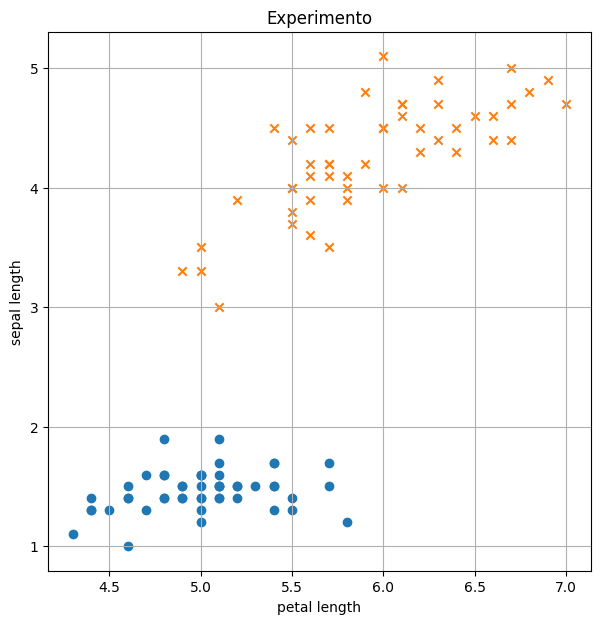

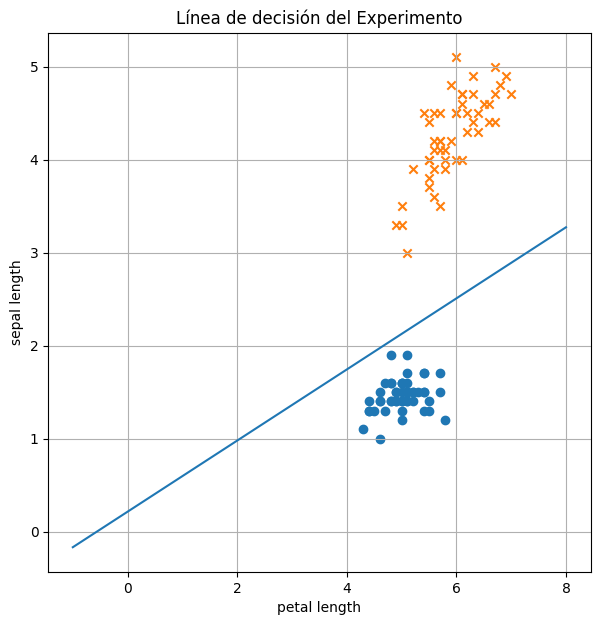

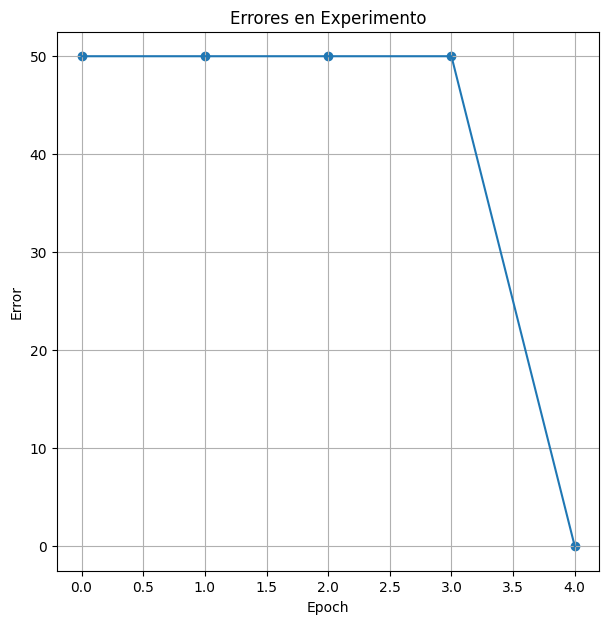



resultado final: bias + X_input  [1.  5.1 1.4] valor esperado:  0 valor obtenido:  0.0
resultado final: bias + X_input  [1.  4.9 1.4] valor esperado:  0 valor obtenido:  0.0
resultado final: bias + X_input  [1.  4.7 1.3] valor esperado:  0 valor obtenido:  0.0
resultado final: bias + X_input  [1.  4.6 1.5] valor esperado:  0 valor obtenido:  0.0
resultado final: bias + X_input  [1.  5.  1.4] valor esperado:  0 valor obtenido:  0.0
resultado final: bias + X_input  [1.  5.4 1.7] valor esperado:  0 valor obtenido:  0.0
resultado final: bias + X_input  [1.  4.6 1.4] valor esperado:  0 valor obtenido:  0.0
resultado final: bias + X_input  [1.  5.  1.5] valor esperado:  0 valor obtenido:  0.0
resultado final: bias + X_input  [1.  4.4 1.4] valor esperado:  0 valor obtenido:  0.0
resultado final: bias + X_input  [1.  4.9 1.5] valor esperado:  0 valor obtenido:  0.0
resultado final: bias + X_input  [1.  5.4 1.5] valor esperado:  0 valor obtenido:  0.0
resultado final: bias + X_input  [1.  4.8

In [62]:
# Instanciación del objeto
perceptron = Perceptron(f_activate="step", n_iter=0, init_weigt=True, shuffle=True,
                        eta=0.5)
# Datos del conjunto Iris
iris = datasets.load_iris()
X = iris.data
Y = iris.target

# Experimento 1
XX = X[:100, [0, 2]]
YY = Y[:100]
# Llamada a la función de entrenamiento con los datos de entrada
perceptron.fit(XX, YY)
# bias + la dimension de X
X_copy = np.ones((XX.shape[0], XX.shape[1] + 1))
X_copy[:, 1:] = XX
X = X_copy

for fila in range(X.shape[0]):
    y_gorro = perceptron.predict(perceptron.w_.T.dot(X[fila, :]))
    print("resultado final: bias + X_input ", X[fila], "valor esperado: ", YY[fila], "valor obtenido: ", y_gorro)



Pesos iniciales [ 0.01624345 -0.00611756 -0.00528172]




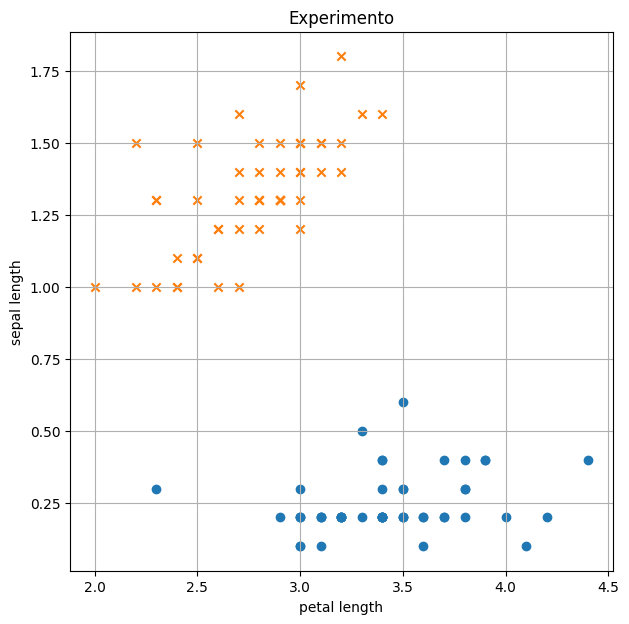

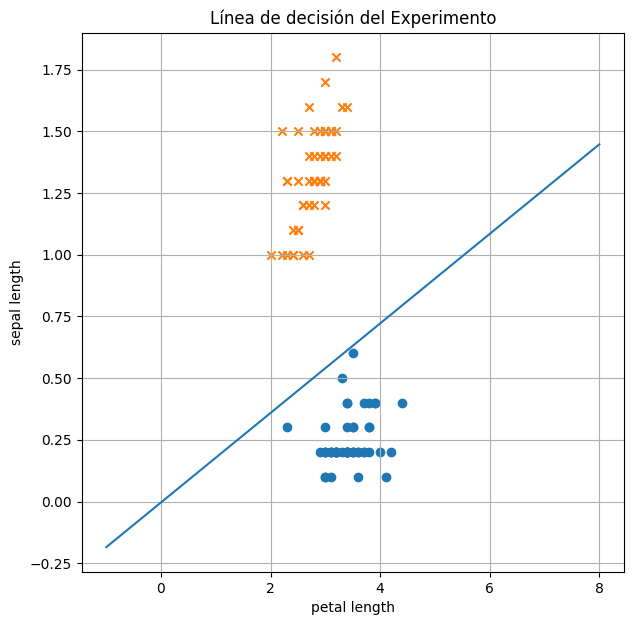

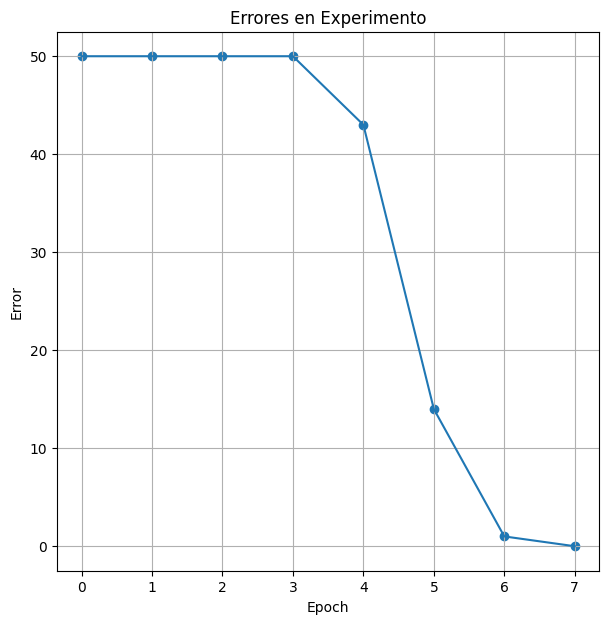



resultado final: bias + X_input  [1.  3.5 0.2] valor esperado:  0 valor obtenido:  0.0
resultado final: bias + X_input  [1.  3.  0.2] valor esperado:  0 valor obtenido:  0.0
resultado final: bias + X_input  [1.  3.2 0.2] valor esperado:  0 valor obtenido:  0.0
resultado final: bias + X_input  [1.  3.1 0.2] valor esperado:  0 valor obtenido:  0.0
resultado final: bias + X_input  [1.  3.6 0.2] valor esperado:  0 valor obtenido:  0.0
resultado final: bias + X_input  [1.  3.9 0.4] valor esperado:  0 valor obtenido:  0.0
resultado final: bias + X_input  [1.  3.4 0.3] valor esperado:  0 valor obtenido:  0.0
resultado final: bias + X_input  [1.  3.4 0.2] valor esperado:  0 valor obtenido:  0.0
resultado final: bias + X_input  [1.  2.9 0.2] valor esperado:  0 valor obtenido:  0.0
resultado final: bias + X_input  [1.  3.1 0.1] valor esperado:  0 valor obtenido:  0.0
resultado final: bias + X_input  [1.  3.7 0.2] valor esperado:  0 valor obtenido:  0.0
resultado final: bias + X_input  [1.  3.4

In [63]:
# Instanciación del objeto
perceptron = Perceptron(f_activate="step", n_iter=0, init_weigt=True, shuffle=False,
                        eta=0.5)
# Datos del conjunto Iris
iris = datasets.load_iris()
X = iris.data
Y = iris.target

# Experimento 2
XX = X[:100, [1, 3]]
YY = Y[:100]

# Llamada a la función de entrenamiento con los datos de entrada
perceptron.fit(XX, YY)
# bias + la dimension de X
X_copy = np.ones((XX.shape[0], XX.shape[1] + 1))
X_copy[:, 1:] = XX
X = X_copy

for fila in range(X.shape[0]):
    y_gorro = perceptron.predict(perceptron.w_.T.dot(X[fila, :]))
    print("resultado final: bias + X_input ", X[fila], "valor esperado: ", YY[fila], "valor obtenido: ", y_gorro)


In [59]:
# Instanciación del objeto
perceptron = Perceptron(f_activate="step", n_iter=10, init_weigt=True, shuffle=False,
                        eta=0.5)
# Datos del conjunto Iris
iris = datasets.load_iris()
X = iris.data
Y = iris.target

# Experimento 3
XX = X[:150, [0, 1, 2, 3]]
YY = Y[:150]
P = [Perceptron(f_activate="step", n_iter=10, init_weigt=True, shuffle=True,eta=0.5),
     Perceptron(f_activate="step", n_iter=20, init_weigt=True, shuffle=True,eta=0.5),
     Perceptron(f_activate="step", n_iter=10, init_weigt=True, shuffle=True,eta=0.5)]

#Clase 1 vs 2 y 3
YY[:50] = 1
YY[50:] = 0
P[0].fit(XX, YY)
# bias + la dimension de X
X_copy = np.ones((XX.shape[0], XX.shape[1] + 1))
X_copy[:, 1:] = XX
X = X_copy
print(X.shape,perceptron.w_.T)
for fila in range(X.shape[0]):
    y_gorro = P[0].predict(P[0].w_.T.dot(X[fila, :]))
    print("resultado final Clase 1 vs 2 y 3 : bias + X_input ", X[fila], "valor esperado: ", YY[fila], "valor obtenido: ", y_gorro)

#Clase 2 vs 1 y 3
YY = Y[:150]
YY[50:100] = 1
YY[:50] = 0
YY[100:] = 0
P[1].fit(XX, YY)
# bias + la dimension de X
X_copy = np.ones((XX.shape[0], XX.shape[1] + 1))
X_copy[:, 1:] = XX
X = X_copy
for fila in range(X.shape[0]):
    y_gorro = P[1].predict(P[1].w_.T.dot(X[fila, :]))
    print("resultado final Clase 2 vs 1 y 3 : bias + X_input ", X[fila], "valor esperado: ", YY[fila], "valor obtenido: ", y_gorro)

#Clase 3 vs 1 y 2
YY = Y[:150]
YY[:100] = 0
YY[100:] = 1
P[2].fit(XX, YY)
# bias + la dimension de X
X_copy = np.ones((XX.shape[0], XX.shape[1] + 1))
X_copy[:, 1:] = XX
X = X_copy
for fila in range(X.shape[0]):
    y_gorro = P[2].predict(P[2].w_.T.dot(X[fila, :]))
    print("resultado final Clase 3 vs 1 y 2 : bias + X_input ", X[fila], "valor esperado: ", YY[fila], "valor obtenido: ", y_gorro)



Pesos iniciales [ 0.01624345 -0.00611756 -0.00528172 -0.01072969  0.00865408]
(150, 5) []
resultado final Clase 1 vs 2 y 3 : bias + X_input  [1.  5.1 3.5 1.4 0.2] valor esperado:  1 valor obtenido:  1.0
resultado final Clase 1 vs 2 y 3 : bias + X_input  [1.  4.9 3.  1.4 0.2] valor esperado:  1 valor obtenido:  1.0
resultado final Clase 1 vs 2 y 3 : bias + X_input  [1.  4.7 3.2 1.3 0.2] valor esperado:  1 valor obtenido:  1.0
resultado final Clase 1 vs 2 y 3 : bias + X_input  [1.  4.6 3.1 1.5 0.2] valor esperado:  1 valor obtenido:  1.0
resultado final Clase 1 vs 2 y 3 : bias + X_input  [1.  5.  3.6 1.4 0.2] valor esperado:  1 valor obtenido:  1.0
resultado final Clase 1 vs 2 y 3 : bias + X_input  [1.  5.4 3.9 1.7 0.4] valor esperado:  1 valor obtenido:  1.0
resultado final Clase 1 vs 2 y 3 : bias + X_input  [1.  4.6 3.4 1.4 0.3] valor esperado:  1 valor obtenido:  1.0
resultado final Clase 1 vs 2 y 3 : bias + X_input  [1.  5.  3.4 1.5 0.2] valor esperado:  1 valor obtenido:  1.0
result